<a href="https://colab.research.google.com/github/vishnub0/AWS-WEP/blob/main/AWS15_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [20]:
import pandas as pd
import numpy as np
!pip install seaborn
print("hello")

hello


Loading the dataset (make sure you upload the CSV files)

In [12]:
BALANCED_DATASET = 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
df = pd.read_csv(BALANCED_DATASET)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


Aidan you should probably make the visualizations at this point (otherwise everything will be between 0 and 1)

Normalize columns

In [13]:
df_norm = df.copy()
features_to_normalize = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
for feature in features_to_normalize:
  max = df_norm[feature].max()
  min = df_norm[feature].min()
  df_norm[feature] = (df_norm[feature] - min) / (max - min)

In [14]:
df_norm

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.166667,1.000000,0.0,1.0,0.250000,1.0,1.000000
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,1.0,1.000000
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.333333,0.0,1.0,1.000000,1.0,1.000000
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.100000,0.0,1.0,0.833333,1.0,1.000000
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.583333,0.8,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,0.0,0.0,0.416667,0.6,0.000000
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,1.0,1.0,0.750000,0.4,0.714286
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.00,0.500000,0.000000,1.0,0.0,1.000000,1.0,0.428571
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,1.0,0.0,0.833333,0.2,0.428571


Splitting data

In [15]:
X = df_norm.drop('Diabetes_binary', axis='columns')
y = df_norm['Diabetes_binary']

In [16]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.50,0.166667,1.000000,0.0,1.0,0.250000,1.0,1.000000
1,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,1.0,1.000000
2,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.333333,0.0,1.0,1.000000,1.0,1.000000
3,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.100000,0.0,1.0,0.833333,1.0,1.000000
4,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.583333,0.8,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.75,0.000000,0.000000,0.0,0.0,0.416667,0.6,0.000000
70688,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,1.0,1.0,0.750000,0.4,0.714286
70689,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.00,0.500000,0.000000,1.0,0.0,1.000000,1.0,0.428571
70690,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,1.0,0.0,0.833333,0.2,0.428571


In [17]:
y

,Diabetes_binary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
70687,1.0
70688,1.0
70689,1.0
70690,1.0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [19]:
# Run this cell if we want a validation dataset for neural nets (should be a 60-20-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 0)

In [27]:
# Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

# Show the first few rows of the dataset
print(df_norm.head())

# Statistical summary

# If you are using a pandas dataframe (pd.DataFrame), or just "df" as it will appear
# in the coming notebooks, you can also use df.describe() to achieve the same thing as what the line below does.
# The line below in fact is very specific to this toy dataset.
print(df_norm.describe())

   Diabetes_binary  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  0.162791     0.0     0.0   
1              0.0     1.0       1.0        1.0  0.162791     1.0     1.0   
2              0.0     0.0       0.0        1.0  0.162791     0.0     0.0   
3              0.0     1.0       1.0        1.0  0.186047     1.0     0.0   
4              0.0     0.0       0.0        1.0  0.197674     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  \
0          0.0     0.50  0.166667  1.000000       

['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


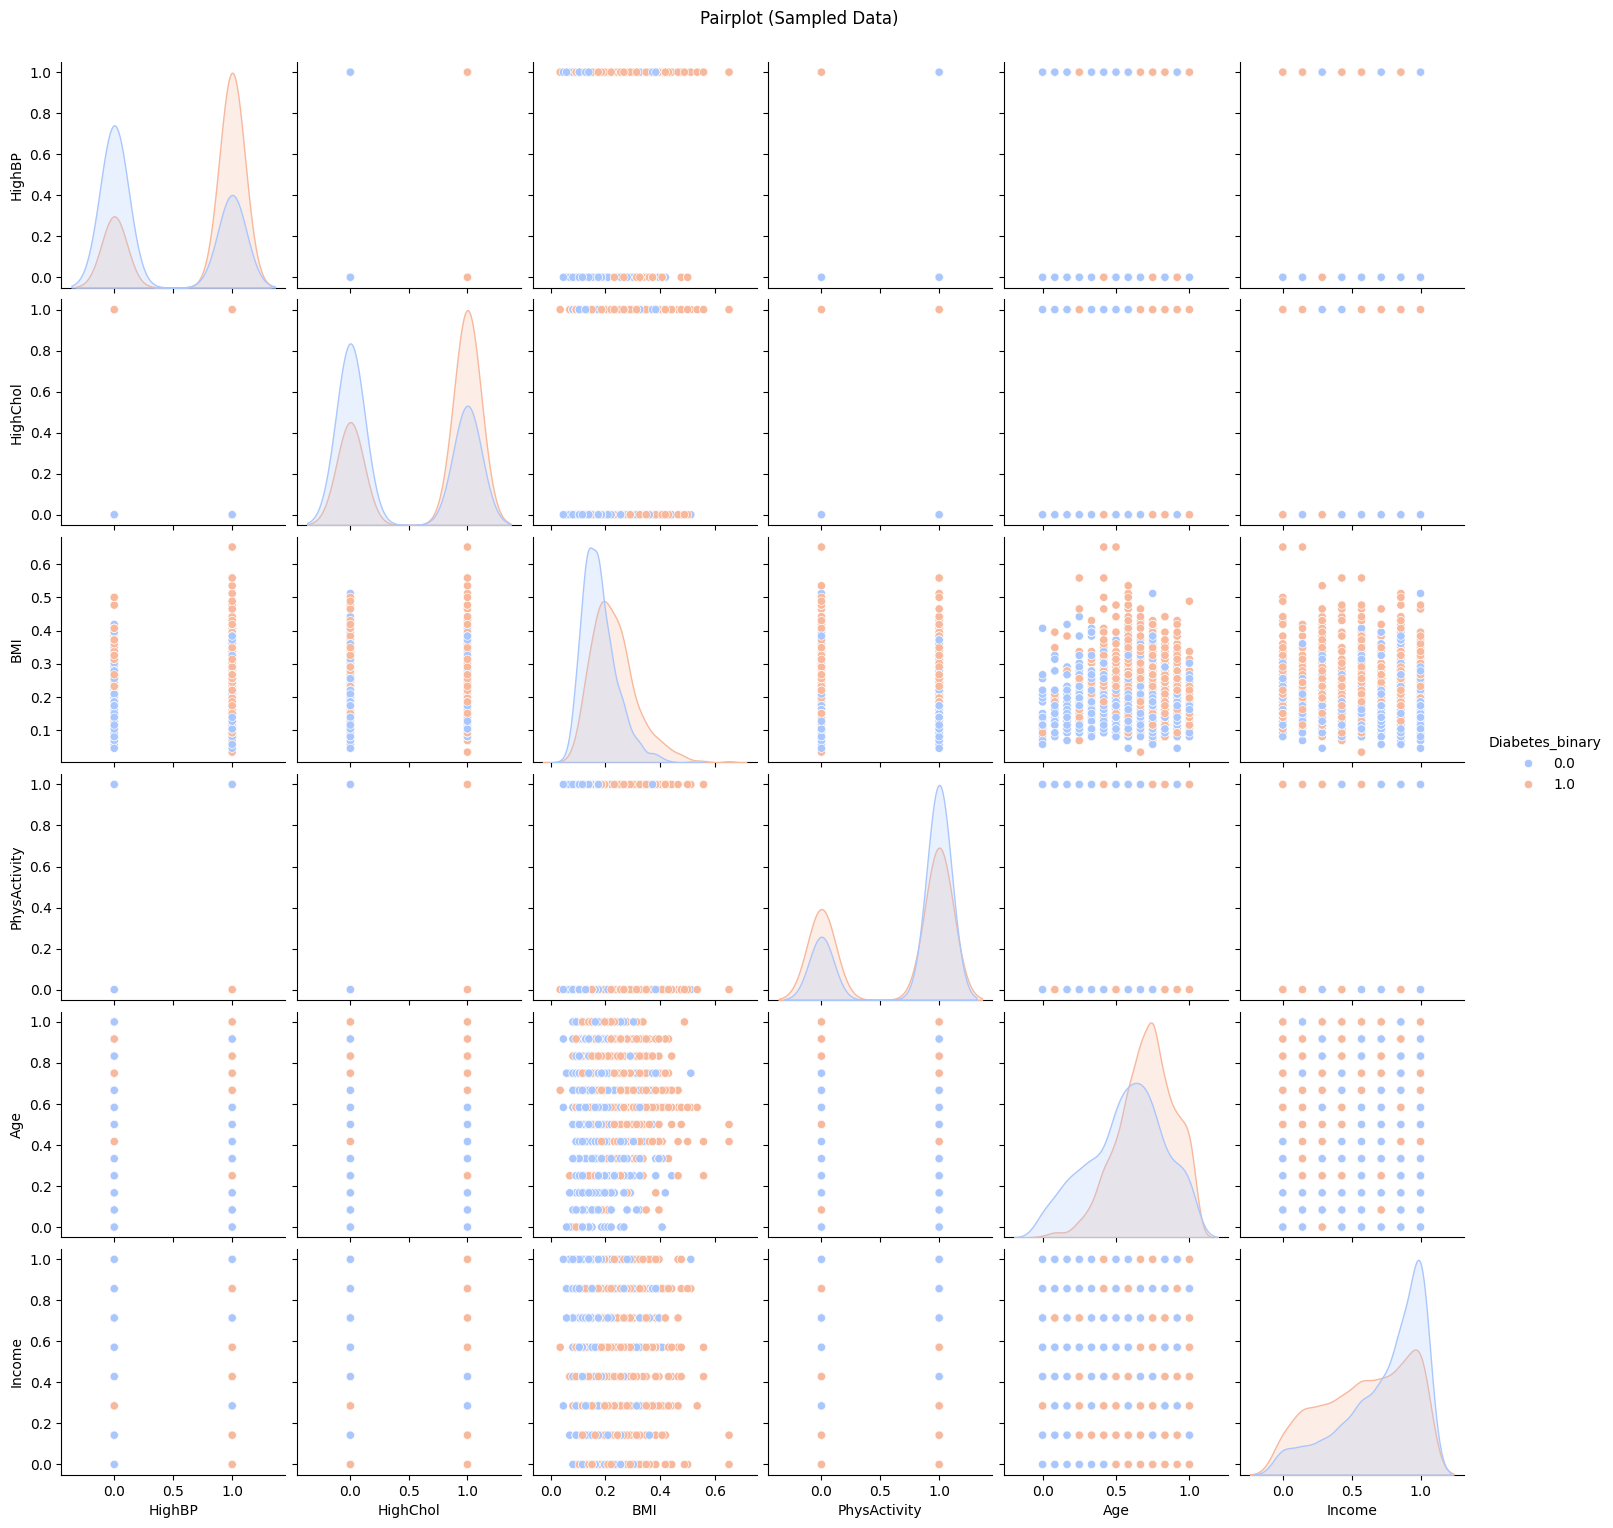

In [30]:
# Pairplot to visualize the relationships between features
df_norm.columns = df_norm.columns.str.strip()
print(df_norm.columns.tolist())
cols_to_plot = ['HighBP', 'HighChol', 'BMI', 'PhysActivity', 'Age', 'Income', 'Diabetes_binary']

# Sample 2000 rows for quicker plotting
df_sampled = df_norm[cols_to_plot].sample(n=2000, random_state=42)
sns.pairplot(df_sampled, hue='Diabetes_binary', palette='coolwarm')
plt.suptitle('Pairplot (Sampled Data)', y=1.02)
plt.show()

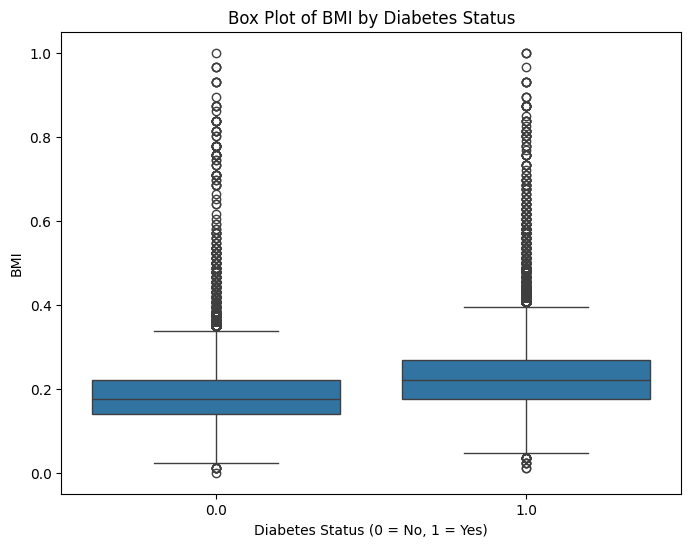

In [34]:
# Box Plot to Compare BMI across diabetes status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes_binary', y='BMI', data=df_norm)
plt.title('Box Plot of BMI by Diabetes Status')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

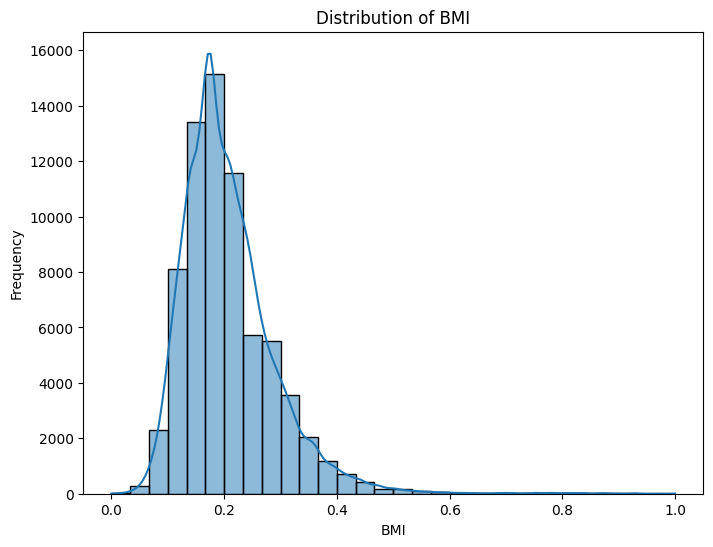

In [33]:
# Histogram of BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_norm['BMI'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

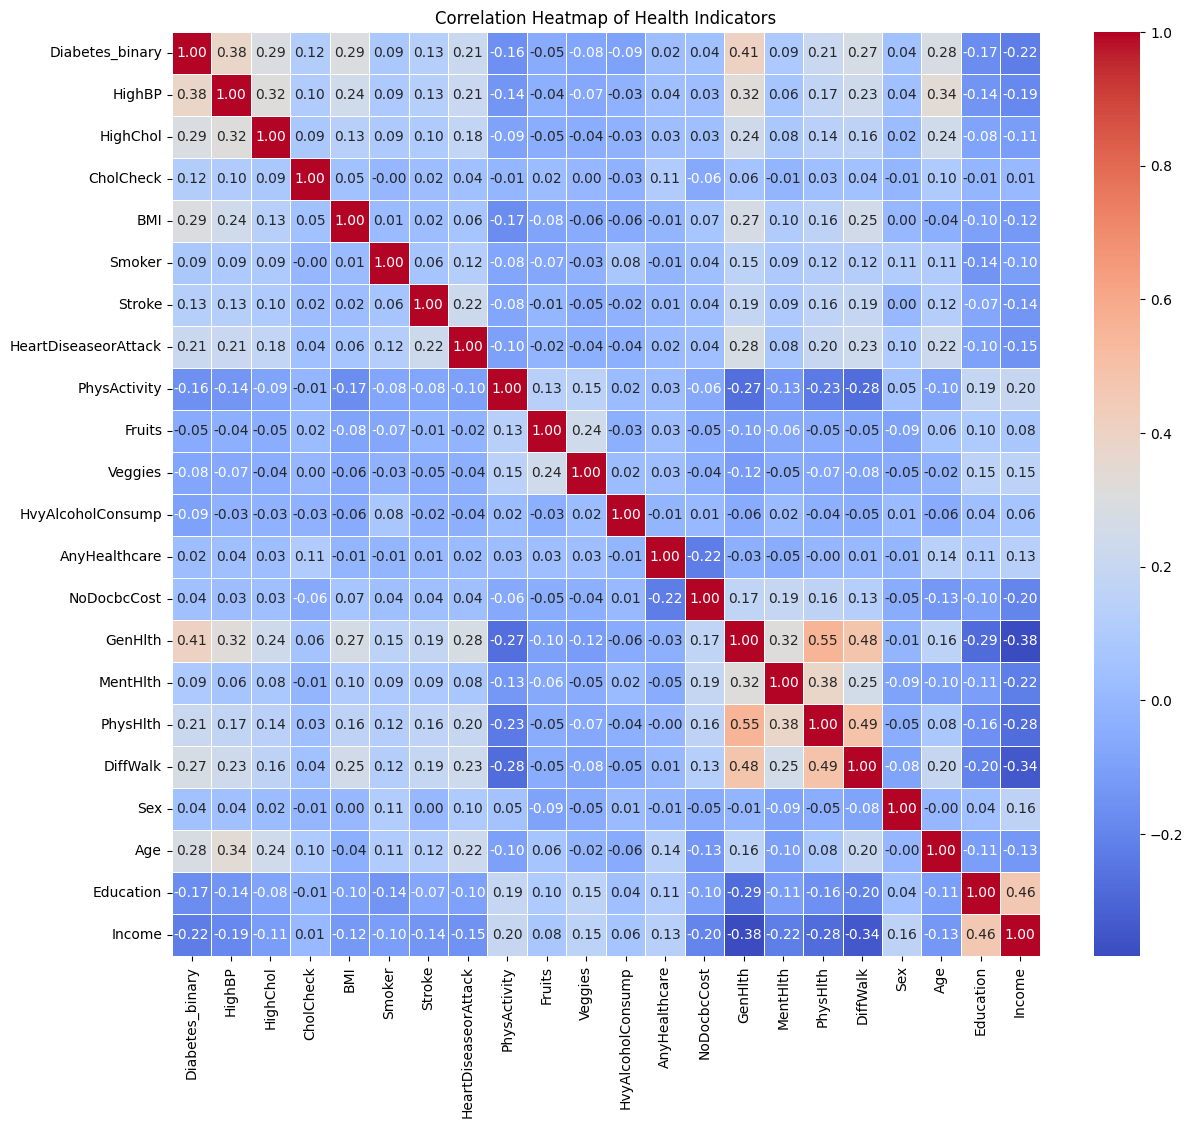

In [35]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(14, 12))
corr_matrix = df_norm.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Health Indicators')
plt.show()